In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


We need to know:
- How many customers were there for each approach?
- What does the spread of the revenue look like overall? And for each method?
- Was there any difference in revenue over time for each of the methods?
- Based on the data, which method would you recommend we continue to use? Some
of these methods take more time from the team so they may not be the best for us
to use if the results are similar.

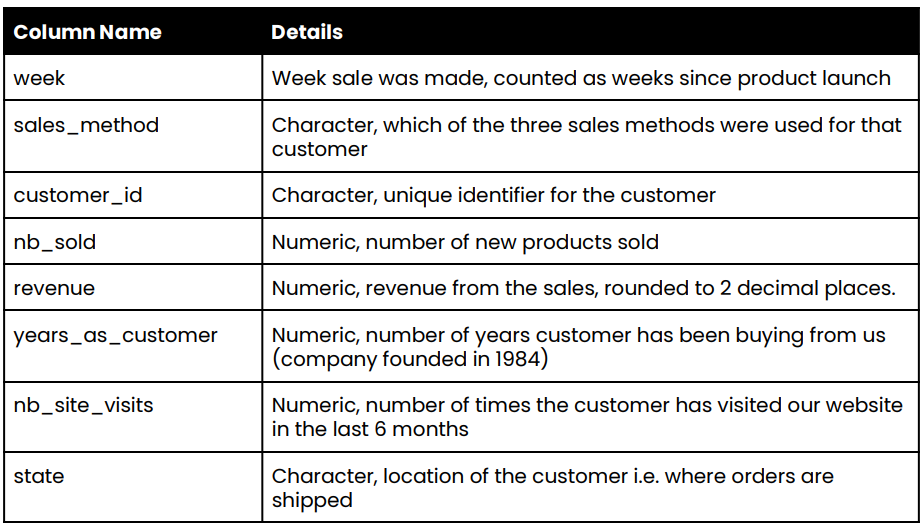

# Bagian Baru

# **Step 1: Load the Data**
First, we need to load the data into a Pandas DataFrame. This will allow us to perform the required analyses.

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Product Sales/product_sales.csv')

In [3]:
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [7]:
# Check info and null values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


,0
week,0
sales_method,0
customer_id,0
nb_sold,0
revenue,0
years_as_customer,0
nb_site_visits,0
state,0


In [6]:
#group by sales method for calculate how many customer any method
df.groupby('sales_method')['customer_id'].count()

# change all value 'em + call' and 'email' in sales_method with 'Email + Call'  for 'em + call' and 'Email' untuk 'email'
df['sales_method'] = df['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'})

# Calculate the percentage of null values in the 'revenue' column
null_percentage = (df['revenue'].isnull().sum() / len(df)) * 100
print(f"Percentage of null values in 'revenue' column: {null_percentage:.2f}%")

# Calculate the mean of the 'revenue' column, excluding null values
mean_revenue = df['revenue'].mean()

# Replace null values in the 'revenue' column with the mean revenue
df['revenue'].fillna(mean_revenue, inplace=True)


Percentage of null values in 'revenue' column: 7.16%


<ipython-input-6-dcba85ae665a>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['revenue'].fillna(mean_revenue, inplace=True)


# **Step 2: How Many Customers Were There for Each Approach?**
To determine how many customers were there for each sales method (sales_method), we group the data by sales_method and count unique customer_id.

Number of customers for each approach:
sales_method
Call            4962
Email           7466
Email + Call    2572
Name: customer_id, dtype: int64


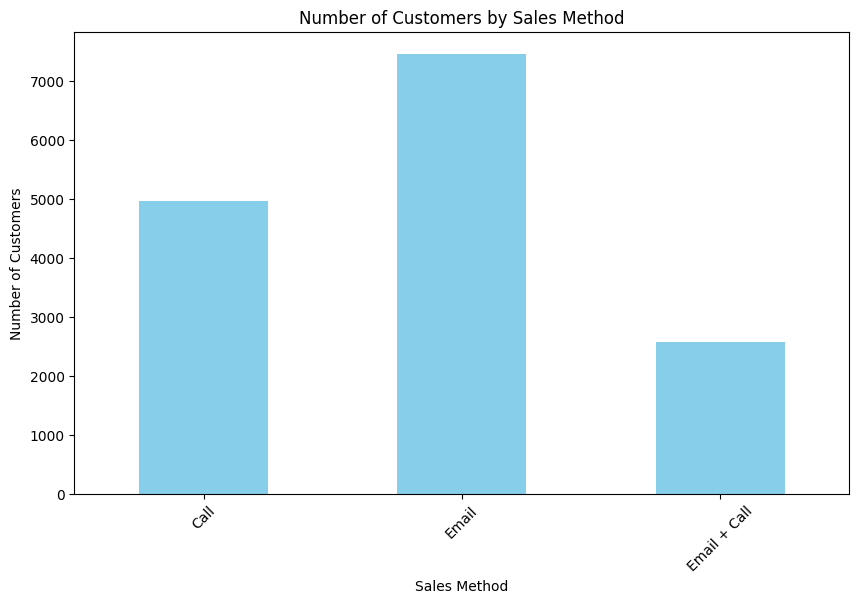

In [8]:
# Count the number of unique customers for each sales method
customer_counts = df.groupby('sales_method')['customer_id'].nunique()

# Print the results
print("Number of customers for each approach:")
print(customer_counts)

# Plot a bar chart for visualization
plt.figure(figsize=(10, 6))
customer_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Customers by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# **Step 3: What Does the Spread of the Revenue Look Like Overall? And for Each Method?**
Overall Revenue Spread:
We'll use a histogram to visualize the overall revenue distribution.

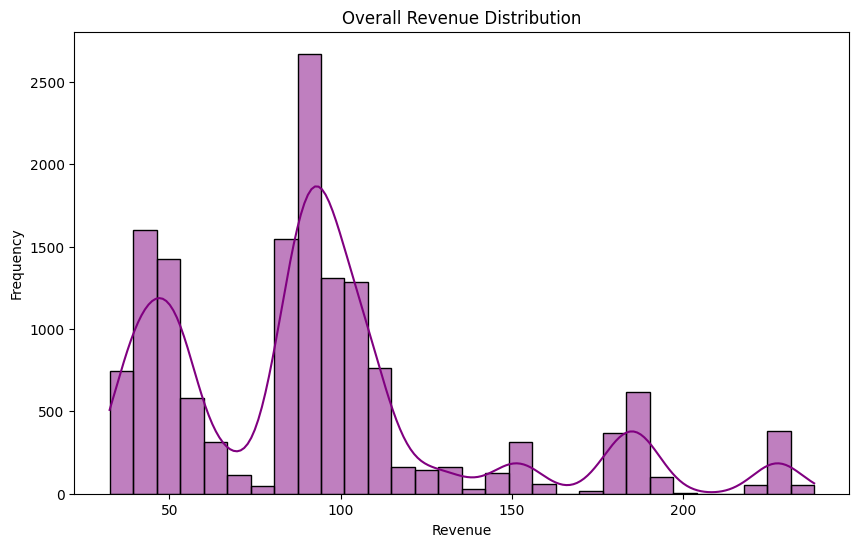

In [10]:
# Plot the overall revenue distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['revenue'], bins=30, kde=True, color='purple')
plt.title('Overall Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

**Revenue Spread for Each Method:**

We'll create boxplots to compare the revenue spread across different sales methods.

<ipython-input-12-ed47e92d6dda>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sales_method', y='revenue', data=df, palette='Set3')


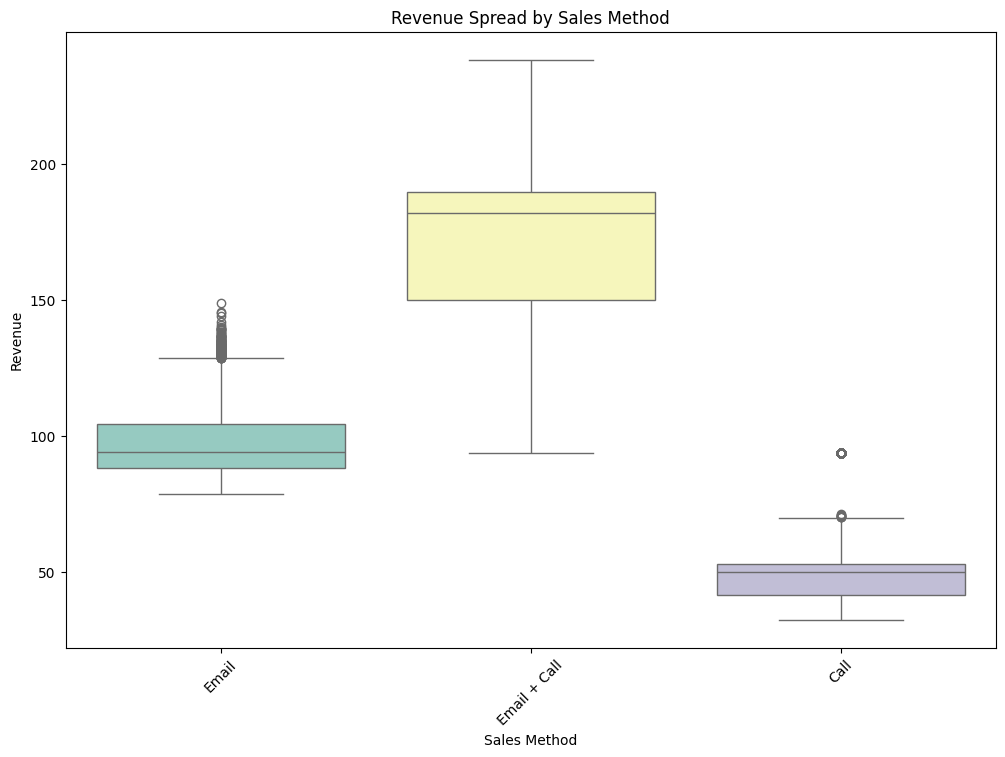

In [12]:
# Boxplot of revenue for each sales method
plt.figure(figsize=(12, 8))
sns.boxplot(x='sales_method', y='revenue', data=df, palette='Set3')
plt.title('Revenue Spread by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

# **Step 4: Was There Any Difference in Revenue Over Time for Each of the Methods?**
To analyze revenue trends over time, we'll group the data by week and sales_method, then calculate the average revenue for each combination.

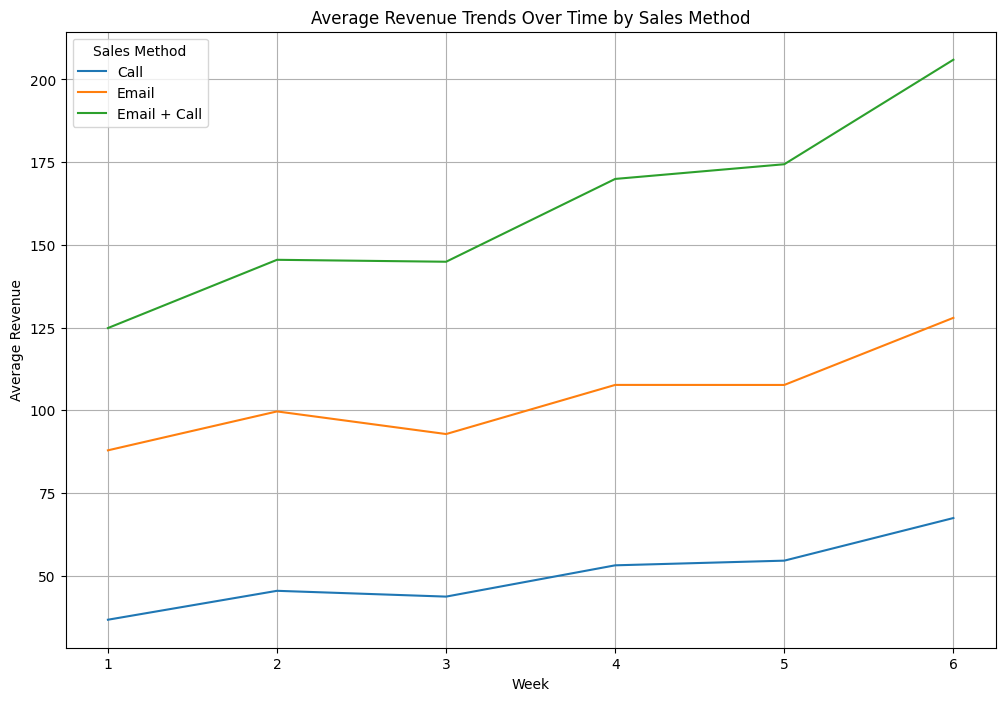

In [13]:
# Calculate average revenue per week for each sales method
revenue_over_time = df.groupby(['week', 'sales_method'])['revenue'].mean().reset_index()

# Pivot the data for better visualization
revenue_pivot = revenue_over_time.pivot(index='week', columns='sales_method', values='revenue')

# Plot line charts for revenue trends over time
plt.figure(figsize=(12, 8))
for method in revenue_pivot.columns:
    plt.plot(revenue_pivot.index, revenue_pivot[method], label=method)

plt.title('Average Revenue Trends Over Time by Sales Method')
plt.xlabel('Week')
plt.ylabel('Average Revenue')
plt.legend(title='Sales Method')
plt.grid(True)
plt.show()

# **Step 5: Which Method Would You Recommend We Continue to Use?**
To make a recommendation, we'll calculate key metrics such as total revenue, average revenue per customer, and the number of customers for each method. Then, we'll evaluate these metrics considering the time investment required for each method.

Summary of each sales method:
   sales_method  Total_Revenue  Average_Revenue_Per_Customer  \
0          Call  244565.714602                     49.287730   
1         Email  723418.438749                     96.895049   
2  Email + Call  441039.984951                    171.477444   

   Number_of_Customers  Revenue_Per_Customer  
0                 4962             49.287730  
1                 7466             96.895049  
2                 2572            171.477444  


<ipython-input-14-6794a961a2d6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sales_method', y='Total_Revenue', data=method_summary, palette='viridis')


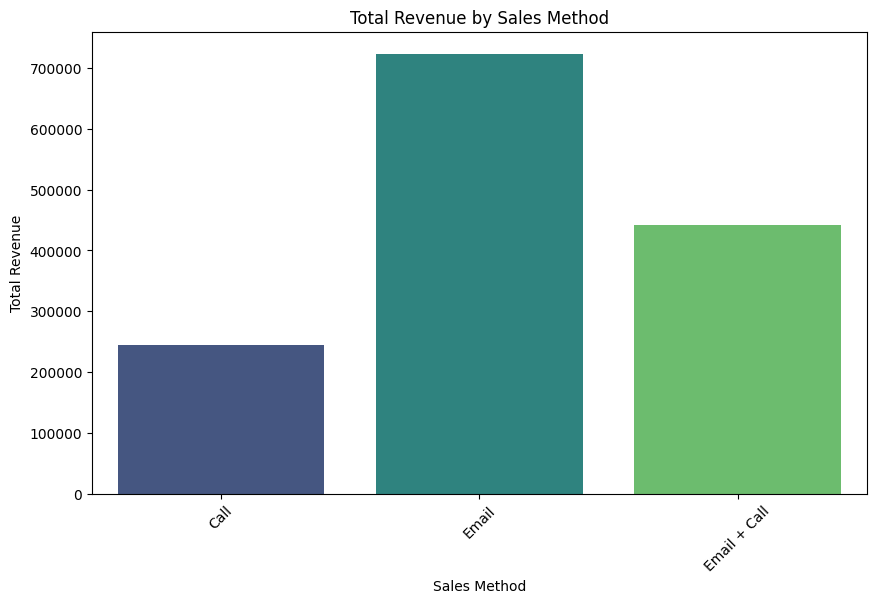

In [14]:
# Calculate total revenue, average revenue per customer, and number of customers for each method
method_summary = df.groupby('sales_method').agg(
    Total_Revenue=('revenue', 'sum'),
    Average_Revenue_Per_Customer=('revenue', 'mean'),
    Number_of_Customers=('customer_id', 'nunique')
).reset_index()

# Add a column for revenue per customer (optional, but useful for comparison)
method_summary['Revenue_Per_Customer'] = method_summary['Total_Revenue'] / method_summary['Number_of_Customers']

# Print the summary table
print("Summary of each sales method:")
print(method_summary)

# Visualize the total revenue for each method
plt.figure(figsize=(10, 6))
sns.barplot(x='sales_method', y='Total_Revenue', data=method_summary, palette='viridis')
plt.title('Total Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

<ipython-input-15-06e4753fc748>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sales_method', y='Average_Revenue_Per_Customer', data=method_summary, palette='magma')


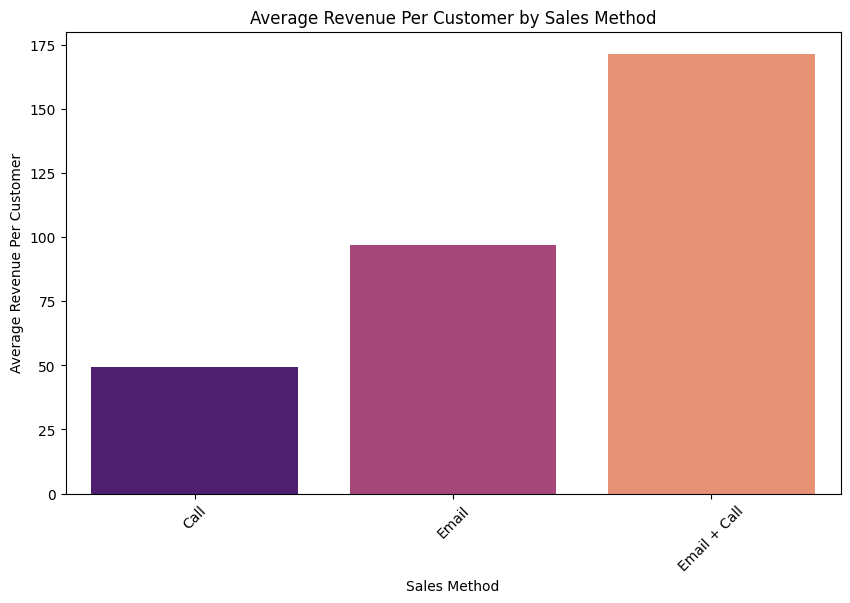

In [15]:
# Visualize the average revenue per customer for each method
plt.figure(figsize=(10, 6))
sns.barplot(x='sales_method', y='Average_Revenue_Per_Customer', data=method_summary, palette='magma')
plt.title('Average Revenue Per Customer by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Average Revenue Per Customer')
plt.xticks(rotation=45)
plt.show()

# **Step 6: Final Recommendation**
Based on the above analysis, we'll recommend the most effective method considering both revenue and time investment.

In [16]:
# Identify the method with the highest average revenue per customer
best_method = method_summary.loc[method_summary['Average_Revenue_Per_Customer'].idxmax()]['sales_method']
print(f"The recommended sales method is: {best_method}")

# Optional: If Email + Call takes more time but yields similar results, consider recommending Email only
if method_summary.loc[method_summary['sales_method'] == 'Email + Call', 'Average_Revenue_Per_Customer'].values[0] < \
   method_summary.loc[method_summary['sales_method'] == 'Email', 'Average_Revenue_Per_Customer'].values[0] * 1.2:
    print("However, if time is a constraint, consider using 'Email' instead.")
else:
    print("If time allows, continue using 'Email + Call' for higher revenue potential.")

The recommended sales method is: Email + Call
If time allows, continue using 'Email + Call' for higher revenue potential.
